# 과제 2

- 기한: 5/1(금) 23:59
- 제출: e-class 업로드
- 비중: 8% (12점)
- 파일형식: .ipynb
- 결과만 간결하게 확인할 수 있게, 제출 전 사용하지 않는 코드는 정리해 주세요.
- 늦게 제출한 경우 점수의 절반만 인정합니다.
- 코드가 동작하지 않는 경우(예:에러 메시지), 파일을 열 수 없는 경우 0점 처리합니다.
- 6 문제의 배점은 모두 같습니다.

## Guide
- Matplotlib/Seaborn 어느 툴을 사용해도 괜찮습니다.
- 예제가 있는 문제는 형태(차트를 그리는 데이터만) 같으면 되고, 색깔이나 스타일은 개인의 자유입니다.

In [1]:
from pandas import Series, DataFrame 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows': 
    path = 'c:\Windows\Fonts\malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == "Linux":
    !apt -qq -y install fonts-nanum
    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = font_manager.FontProperties(fname=fontpath, size=9)
    rc('font', family='NanumBarunGothic') 
    font_manager._rebuild()
else:
    print("unknown system")

In [3]:
url = "https://raw.githubusercontent.com/eunyu1031/Media_interface_2020Spr/master/p19_mediapanel.csv"

data = pd.read_csv(url, encoding = 'utf-8')
data.head()

,pid,hid,area,area_siz,hhld_siz,fly_typ,gender,byear,age_gr,age,...,news_med1,news_med2,news_med3,news_plat1,news_plat2,news_plat3,channel,shop,shop_dev,shop_pay
0,10001,100,1,1,3,3,1,1967,6,52,...,3,4,,3,2,,1,1,1,2
1,10002,100,1,1,3,3,2,1972,5,47,...,3,4,,3,2,,3,1,1,2
2,20001,200,1,1,3,3,1,1965,6,54,...,4,,,3,,,7,,,
3,30001,300,8,1,3,3,1,1971,5,48,...,3,,,3,,,1,,,
4,30002,300,8,1,3,3,2,1974,5,45,...,,,,,,,1,1,3,1


In [4]:
temp = data.loc[:,['pid','age_gr','gender','age','app_num','appin_num','c06', 
                   'freq_sns1', 'channel']]
temp.head()

,pid,age_gr,gender,age,app_num,appin_num,c06,freq_sns1,channel
0,10001,6,1,52,,5,10,15,1
1,10002,5,2,47,,6,12,15,3
2,20001,6,1,54,,,,16,7
3,30001,5,1,48,,1,6,,1
4,30002,5,2,45,,2,6,,1


In [5]:
app = temp.apply(lambda x: pd.to_numeric(x, errors = 'coerce').replace(0,np.nan))
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pid        10864 non-null  int64  
 1   age_gr     10864 non-null  int64  
 2   gender     10864 non-null  int64  
 3   age        10864 non-null  int64  
 4   app_num    412 non-null    float64
 5   appin_num  764 non-null    float64
 6   c06        921 non-null    float64
 7   freq_sns1  4829 non-null   float64
 8   channel    10359 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 764.0 KB


<table style="width: 82%;">
<thead>
<tr style="height: 35px;">
<td style="width: 13%; height: 35px;">
<p>Original</p>
</td>
<td style="width: 13%; height: 35px;">
<p>Cleaned</p>
</td>
<td style="width: 55%; height: 35px;">
<p>Description</p>
</td>
</tr>
</thead>
<tbody>
<tr style="height: 37px;">
<td style="width: 13%; height: 37px;">
<p>p__c06008</p>
</td>
<td style="width: 13%; height: 37px;">
<p><strong>app_num</strong></p>
</td>
<td style="width: 55%; height: 37px;">
<p>유료 애플리케이션 구입 개수</p>
</td>
</tr>
<tr style="height: 37px;">
<td style="width: 13%; height: 37px;">
<p>p__c06009</p>
</td>
<td style="width: 13%; height: 37px;">
<p><strong>appin_num</strong></p>
</td>
<td style="width: 55%; height: 37px;">
<p>유/무료 애플리케이션 내 아이템 및 확장기능 구입 개수</p>
</td>
</tr>
<tr style="height: 37px;">
<td style="width: 13%; height: 37px;">
<p>p__c06010</p>
</td>
<td style="width: 13%; height: 37px;">
<p><strong>c06</strong></p>
</td>
<td style="width: 55%; height: 37px;">
<p>애플리케이션 관련 지출 금액</p>
</td>
</tr>
<tr style="height: 37px;">
<td style="width: 13%; height: 37px;">
<p>p__d11002</p>
</td>
<td style="width: 13%; height: 37px;">
<p><strong>freq_sns1</strong></p>
</td>
<td style="width: 55%; height: 37px;">
<p>[미디어 이용행태] 주로 사용하는 SNS 계정 1순위<br>1. 트위터 (Twitter) 2. 페이스북 (Facebook) 3. 싸이월드 미니홈피 12. 카카오스토리 13. 기타 15. 인스타그램(instagram) 16. 네이버 밴드 20. 비트윈 21. 웨이보 22. 핀터레스트 23. 유튜브 9999. 모름/무응답</p>
</td>
</tr>
<tr style="height: 37px;">
<td style="width: 13%; height: 37px;">
<p>p__i01001</p>
</td>
<td style="width: 13%; height: 37px;">
<p><strong>channel</strong></p>
</td>
<td style="width: 55%; height: 37px;">
<p>[전자상거래 및 통신판매] 구매정보 습득을 위해 우선적으로 이용하는 채널<br>1.포털 사이트 검색 2.온라인 오픈마켓 검색 3.소셜커머스 검색 4.특정 온라인 쇼핑몰 방문 5.특정 SNS, 블로그 등 6.백화점이나 로드샵 등 오프라인 방문 7.가족, 친구 등 주변인을 통한 정보 습득 등 기타 8.유튜브(동영상플랫폼) 등 검색 9999.모름/ 무응답</p>
</td>
</tr>
</tbody>
</table>

<img src='https://github.com/eunyu1031/Media_interface_2020Spr/blob/master/pics/description1.PNG?raw=true' width='600'/>

## 문제 1

- 도수분포표
- 전자상거래 및 통신판매에서 구매정보를 얻기 위해 우선적으로 SNS를 방문하는 사람들을 대상으로 어떤 소셜미디어를 1순위로 사용하는지 살펴보세요.

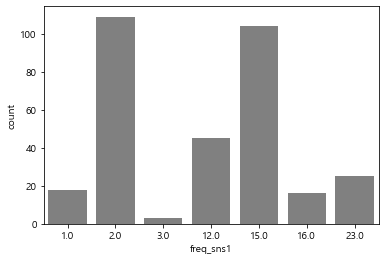

## 문제 2
- 도수분포표
- 문제 1의 결과에서 성별 간 분포의 차이가 있는지 더 나누어 살펴보세요.

## 문제 3
- 박스플롯
- 이용하는 사람이 가장 많은 1, 2, 3순위 소셜미디어만 대상으로, 각 소셜미디어 내에서의 성별 분포는 어떠한지 살펴보세요.

## 문제 4
- 수직막대그래프
- 어플리케이션 관련으로 돈을 지출하는 사람들을 연령대별로 구분하되, 지출금액은 이상치의 영향이 덜한 중앙값을 살펴봅니다.
- 기본값이 아닌 다른 색상/팔레트로 바꾸어 보세요.

## 문제 5
- 수평막대그래프
- 유료 어플리케이션을 구입하는 사람들을 연령대별로 구분하되, 각 연령대별 구입개수의 최대값을 살펴봅니다.
- 차트에 적절한 제목과 x, y 라벨을 붙입니다.

## 문제 6
- 수평막대그래프
- 유/무료 어플리케이션 내 아이템 및 확장기능 구입 개수의 평균을 보고자 합니다.
- 95%를 초과하는 큰 이상치를 포함하는 평균과 제외한 평균을 하나의 그래프에 함께 겹쳐서 그려 같은 선상에서 비교합니다. 
- 차트에 범례와 적절한 제목, x/y 라벨을 추가합니다.

In [20]:
app['appin_num'].quantile(q = 0.95)

10.0

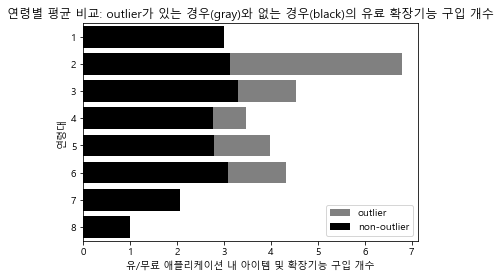